## Trying out the 1D functionality of MEEP

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import shutil

import meep as mp

import sys
sys.path.append('../../lib')
import meep_nb as mpnb

In [16]:
cell = mp.Vector3(100, 0, 0)
background = mp.Block(mp.Vector3(cell.x, 1e20, 1e20),
                     center=mp.Vector3(0),
                     material=mp.Medium(epsilon=1))
ampsection = mp.Block(mp.Vector3(40, 1e20, 1e20), center=mp.Vector3(0), material=mp.Medium(epsilon=5, D_conductivity=.05))
geometry = [background, ampsection]

dpml = 2.
pml_layers = [mp.PML(dpml)]

fcen = 1 / 1.218
df = fcen / 5
sources = [mp.Source(mp.ContinuousSource(fcen, fwidth=df), 
                     component=mp.Ey,
                     center=mp.Vector3(-cell.x / 2 + dpml))]

resolution = 20

In [17]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution,
                    symmetries=[],
                    progress_interval=1e6)

# eps_data = mpnb.show_geometry(sim)


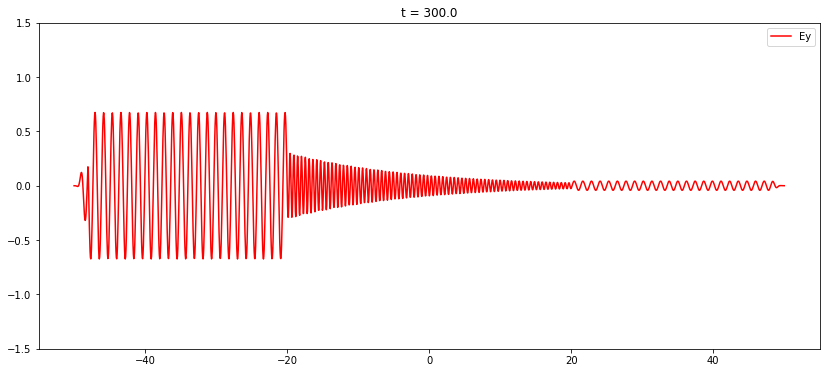

run 0 finished at t = 300.0 (12000 timesteps)


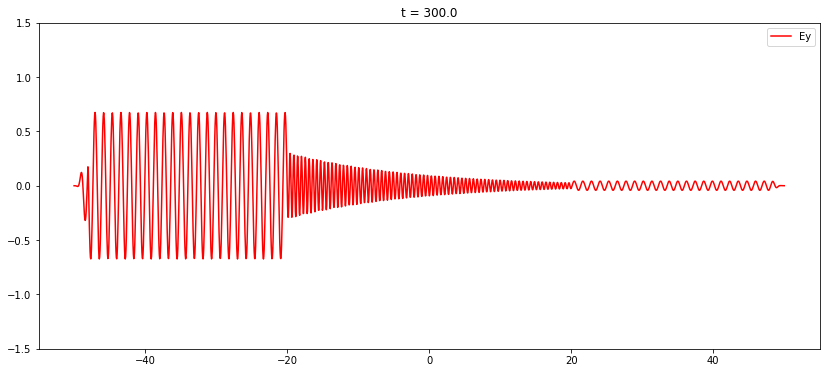

In [18]:
def livefield(sim):
    mpnb.liveplot_1D(sim, mp.Ey)
    
def plot_sim(until=200):
    sim.reset_meep()
    shutil.rmtree('outputs', ignore_errors=True)
    sim.use_output_directory('outputs')
    sim.run(
            mp.at_beginning(livefield),
            mp.at_every(2, livefield),
#             mp.at_every(1, mp.output_png(mp.Ey, "-Zc dkbluered")),
#             mp.to_appended("ez", mp.at_every(0.6, mp.output_efield_z)),
            until=until)

    
plt.figure(figsize=(14,6))
plt.ylim(-1.5, 1.5)
plot_sim(300)